In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display, HTML
import datetime
from plotnine import *

%matplotlib inline
plt.rcParams.update({'xtick.direction': 'out', 'axes.spines.top': False, 'axes.spines.right': False})

df1 = pd.read_csv('dataverse_files/main_data.tab', sep="\t")
df1 = df1.dropna(axis=0, subset='time')
df1.filter(regex='\w*simple\w*')

,matched_simple
59,NaN
60,NaN
61,NaN
62,NaN
63,NaN
...,...
133635,NaN
133636,NaN
133637,NaN
133638,NaN


In [2]:
model = smf.ols('repression ~ C(hostcity)*time + lnpop_1970 + literacy_avg + lnrebact1974 +\
                    lnrepression70_77 + C(zone2) + C(zone3) + C(zone4) + C(zone5)', data=df1)\
                .fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.19
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.59e-25
Time:                        16:28:25   Log-Likelihood:                 48309.
No. Observations:               56394   AIC:                        -9.659e+04
Df Residuals:                   56382   BIC:                        -9.649e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0045      0.005     -0.975      0.330      -0.013       0.005
C(hostcity)[T.1.0]          0.1180      0.037      3.187      0.001       0.045       0.191
C(zone2)[T.1]              -0.0265      0.003     -8.078      0.000      -0.033      -0.020
C(zone3)[T.1]              -0.0210      0.003     -7.578      0.000      -0.026      -0.016
C(zone4)[T.1]              -0.0173      0.006     -2.724      0.006      -0.030      -0.005
C(zone5)[T.1]              -0.0169      0.002     -7.924      0.000      -0.021      -0.013
time                       -0.0009      0.001     -0.891      0.373      -0.003       0.001
C(hostcity)[T.1.0]:time     0.0625      0.061      1.027      0.305      -0.057       0.182
lnpop_1970                  0.0057      0.001      6.475      0.000       0.004       0.007
literacy_avg               -0.0425      0.005     -8.355      0.000      -0.053      -0.033
lnrebact1974               -0.0025      0.000     -5.734      0.000      -0.003      -0.002
lnrepression70_77           0.0055      0.001      7.113      0.000       0.004       0.007
==============================================================================
Omnibus:                   145241.449   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3536940890.970
Skew:                          29.535   Prob(JB):                         0.00
Kurtosis:                    1228.460   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [3]:
s = model.get_prediction().summary_frame(alpha=0.05)
s

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
59,-0.005509,0.001669,-0.008780,-0.002239,-0.206919,0.195900
60,-0.005519,0.001664,-0.008780,-0.002258,-0.206928,0.195890
61,-0.005528,0.001659,-0.008780,-0.002277,-0.206937,0.195881
62,-0.005538,0.001654,-0.008780,-0.002295,-0.206947,0.195871
63,-0.005547,0.001650,-0.008780,-0.002314,-0.206956,0.195862
...,...,...,...,...,...,...
133367,-0.012355,0.001608,-0.015507,-0.009204,-0.213763,0.189052
133368,-0.012365,0.001611,-0.015523,-0.009207,-0.213772,0.189043
133369,-0.012374,0.001615,-0.015539,-0.009209,-0.213782,0.189033
133370,-0.012384,0.001618,-0.015556,-0.009212,-0.213792,0.189024


In [4]:
df = df1.reset_index()

In [5]:
f = model.fittedvalues.to_frame()
f = f.rename(columns={0: 'pred'})
f['pred'] = np.exp(f['pred'])
f

,pred
59,0.994506
60,0.994496
61,0.994487
62,0.994478
63,0.994468
...,...
133367,0.987721
133368,0.987711
133369,0.987702
133370,0.987693


In [6]:
0.237827 + 0.302462 - 0.173192

0.367097

In [7]:
p = pd.concat([s, f, df1], axis=1)
#p = pd.concat([f, df1], axis=1)
p = p.dropna(subset='pred')
p

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred,muni,id,prov,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
59,-0.005509,0.001669,-0.008780,-0.002239,-0.206919,0.195900,0.994506,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
60,-0.005519,0.001664,-0.008780,-0.002258,-0.206928,0.195890,0.994496,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
61,-0.005528,0.001659,-0.008780,-0.002277,-0.206937,0.195881,0.994487,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
62,-0.005538,0.001654,-0.008780,-0.002295,-0.206947,0.195871,0.994478,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
63,-0.005547,0.001650,-0.008780,-0.002314,-0.206956,0.195862,0.994468,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133367,-0.012355,0.001608,-0.015507,-0.009204,-0.213763,0.189052,0.987721,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133368,-0.012365,0.001611,-0.015523,-0.009207,-0.213772,0.189043,0.987711,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133369,-0.012374,0.001615,-0.015539,-0.009209,-0.213782,0.189033,0.987702,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133370,-0.012384,0.001618,-0.015556,-0.009212,-0.213792,0.189024,0.987693,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN


/var/folders/gq/cdzslxdn7dg5ln3bb9cklssr0000gn/T/ipykernel_3751/3326867309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/gq/cdzslxdn7dg5ln3bb9cklssr0000gn/T/ipykernel_3751/3326867309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


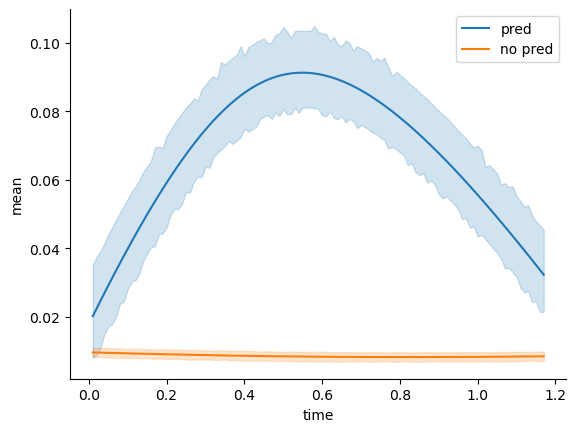

In [14]:
ph = p.loc[p['hostcity'] == 1.0]
pnh = p.loc[p['hostcity'] == 0.0]
ph['mean'] -= (ph['mean_ci_upper'] - ph['mean_ci_lower'])
pnh['mean'] += (pnh['mean_ci_upper'] - pnh['mean_ci_lower'])
ax = sns.lineplot(data=ph, x='time', y='mean', label='pred')
ax = sns.lineplot(data=pnh, x='time', y='mean', label='no pred')